# 🎥Movie Recommendation System
**Business Objective:** Scrape Movie dataset from IMDB, perform analysis for deeper insights and build a recommendation system.

<img src = 'https://media4.giphy.com/media/1d5O0wCL9KI8PIDZWT/giphy.gif' style = 'border-radius:10%; width:800px; height:450px;'/>

#Web scraping of IMDb data

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs

In [2]:
url='https://www.imdb.com/list/ls063676189/'

In [3]:
r=requests.get(url)
r

<Response [200]>

In [4]:
soup=bs(r.text,'lxml')
soup

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
<script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
<title>Feature Film Top 10000 (Part 1) - IMDb</title>
<script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
<script>
    if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
</script>
<script>
    if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {wb: 1});
    }
</script>
<link href="https://www.imdb.com/list/ls063676189/" rel="canonical"/>
<meta content="http://www.imdb.com/list/ls063676189/" property="og:url"/>
<script>
    if (typeof uet == 'fu

In [5]:
np=soup.find("a",class_="lister-page-next").get("href")
np

'/list/ls063676189/?page=2'

In [6]:
cnp='https://www.imdb.com'+np
cnp

'https://www.imdb.com/list/ls063676189/?page=2'

In [7]:
url='https://www.imdb.com/list/ls063676189/?page=2'

In [8]:
p=requests.get(url)
p

<Response [200]>

In [9]:
for i in range(0,5):
    url='https://www.imdb.com/list/ls063676189/?page='+str(i)
    p=requests.get(url)
    soup=bs(p.text,'lxml')
    np=soup.find('a',class_='lister-page-next').get('href')
    cnp='https://www.imdb.com'+np
    print(cnp)

https://www.imdb.com/list/ls063676189/?page=2
https://www.imdb.com/list/ls063676189/?page=2
https://www.imdb.com/list/ls063676189/?page=3
https://www.imdb.com/list/ls063676189/?page=4
https://www.imdb.com/list/ls063676189/?page=5


In [10]:
movie_name=[]
year=[]
rating=[]
metascore=[]
gross_income=[]
votes=[]
runtime=[]
genre=[]
certificate=[]
description=[]
directors=[]
stars=[]

In [11]:
for i in range (0,50):
    url='https://www.imdb.com/list/ls063676189/?page='+str(i)
    p=requests.get(url)
    soup=bs(p.text,'lxml')
    m_name=soup.find_all('div',class_="lister-item mode-detail")
    for i in m_name:
        name=i.h3.a.text
        movie_name.append(name)
    print(len(movie_name))
    # movie name



    m_year=soup.find_all('span',class_='lister-item-year text-muted unbold')
    for i in m_year:
        year1=i.text
        year1 = year1.replace('(', '').replace(')', '').replace('I','').replace('II','')
        year.append(year1)
    print(len(year))
    # movie_year


    m_rating=soup.find_all('div',class_='ipl-rating-star small')
    for i in m_rating:
        rating1=i.text.replace('\n',"")
        rating.append(rating1)
    print(len(rating))
    #rating


    m_runtime=soup.find_all('span',class_='runtime')
    for i in m_runtime:
        runtime1=i.text.replace('min','')
        runtime.append(runtime1)
    print(len(runtime))
    # runtime


    m_genre=soup.find_all('span',class_='genre')
    for i in m_genre:
        genre1=i.text.replace('\n',"")
        genre.append(genre1)
    print(len(genre))
    #genre



    m_description=soup.find_all('p',class_='')
    for i in m_description:
        description1=i.text.replace('\n',"")
        description.append(description1)
    print(len(description))
    #description


    m_votes_gross = soup.find_all('div', class_='lister-item mode-detail')
    for item in m_votes_gross:
        mvg = item.find_all('span', attrs={'name': 'nv'})
        if len(mvg) == 2:
            vote = int(mvg[0].text.replace(',', ''))
            gross = float(mvg[1].text.replace('$', '').replace('M', '').replace(',', ''))

            votes.append(vote)
            gross_income.append(gross)
        else:
            votes.append('0')
            gross_income.append('0')
    print(len(votes))
    print(len(gross_income))
    # votes and gross



    m_metascore = soup.find_all('div', class_='inline-block ratings-metascore')
    for i in m_metascore:
        metascore1 = i.span.text
        # Check for empty values and replace them with zero
        if metascore1.strip():
            metascore.append(metascore1)
        else:
            metascore.append('0')
    print(len(metascore))
    #metascore

100
100
100
100
100
100
100
100
100
200
200
200
200
200
200
200
200
200
300
300
300
300
300
300
300
300
300
400
400
400
400
400
400
400
400
400
500
500
500
500
500
500
500
500
500
600
600
600
600
600
600
600
600
600
700
700
700
700
700
700
700
700
699
800
800
800
800
800
800
800
800
799
900
900
900
900
900
900
900
900
897
1000
1000
1000
1000
1000
1000
1000
1000
996
1100
1100
1100
1100
1100
1100
1100
1100
1095
1200
1200
1200
1200
1200
1200
1200
1200
1194
1300
1300
1300
1300
1300
1300
1300
1300
1293
1400
1400
1400
1400
1400
1400
1400
1400
1392
1500
1500
1500
1500
1500
1500
1500
1500
1490
1600
1600
1600
1600
1600
1600
1600
1600
1589
1700
1700
1700
1700
1700
1700
1700
1700
1687
1800
1800
1800
1800
1800
1800
1800
1800
1783
1900
1900
1900
1900
1900
1900
1900
1900
1882
2000
2000
2000
2000
2000
2000
2000
2000
1977
2100
2100
2100
2100
2100
2100
2100
2100
2073
2200
2200
2200
2200
2200
2200
2200
2200
2168
2300
2300
2300
2300
2300
2300
2300
2300
2266
2400
2400
2400
2400
2400
2400
2400
2400
2364
25

In [12]:
m_director_star=[]

In [13]:
for i in range (0,50):
    url='https://www.imdb.com/list/ls063676189/?page='+str(i)
    p=requests.get(url)
    soup=bs(p.text,'lxml')
    m_director=soup.find_all('p',class_='text-muted text-small')
    for i in m_director:
        m_director_star1=i.text.replace('\n','')
        m_director_star.append(m_director_star1)
    print(len(m_director_star))

300
600
900
1200
1500
1800
2100
2400
2700
3000
3300
3600
3900
4200
4500
4800
5100
5400
5700
6000
6300
6600
6900
7200
7500
7800
8100
8400
8700
9000
9300
9600
9900
10200
10500
10800
11100
11400
11700
12000
12300
12600
12900
13200
13500
13800
14100
14400
14700
15000


In [14]:
m_director_star[0]

'A|142 min|Drama            '

In [15]:
certificate_=[]
for i in range(0,15000,3):
    certificate_.append(m_director_star[i])

In [16]:
certificate_

['A|142 min|Drama            ',
 'UA|152 min|Action, Crime, Drama            ',
 'UA|148 min|Action, Adventure, Sci-Fi            ',
 'A|139 min|Drama            ',
 'A|154 min|Crime, Drama            ',
 'UA|142 min|Drama, Romance            ',
 'U|178 min|Action, Adventure, Drama            ',
 'A|136 min|Action, Sci-Fi            ',
 'U|201 min|Action, Adventure, Drama            ',
 'A|175 min|Crime, Drama            ',
 'UA|164 min|Action, Drama, Thriller            ',
 'UA|179 min|Action, Adventure, Drama            ',
 'A|127 min|Crime, Drama, Mystery            ',
 'UA|143 min|Action, Sci-Fi            ',
 'UA|155 min|Action, Adventure, Drama            ',
 'UA|140 min|Action, Crime, Drama            ',
 'A|165 min|Drama, Western            ',
 'UA|169 min|Adventure, Drama, Sci-Fi            ',
 'U|121 min|Action, Adventure, Fantasy            ',
 'A|118 min|Crime, Drama, Thriller            ',
 'UA|162 min|Action, Adventure, Fantasy            ',
 'A|153 min|Adventure, Drama, 

In [17]:
certificate=[]
m= []
v=[]
for i in certificate_:
    split_result = i.split('|')
    if len(split_result) == 3:
        certificate_2, m1,v1 = split_result
    elif len(split_result) == 2:
        m1,v1 = split_result[0],split_result[1]
        certificate_2='Not Rated'


    certificate.append(certificate_2)

In [18]:
certificate

['A',
 'UA',
 'UA',
 'A',
 'A',
 'UA',
 'U',
 'A',
 'U',
 'A',
 'UA',
 'UA',
 'A',
 'UA',
 'UA',
 'UA',
 'A',
 'UA',
 'U',
 'A',
 'UA',
 'A',
 'A',
 'A',
 'A',
 'UA',
 'U',
 'UA',
 'UA',
 'UA',
 'UA',
 'UA',
 'A',
 'A',
 'R',
 'UA',
 'A',
 'A',
 'A',
 'A',
 'A',
 'U',
 'A',
 'A',
 'U',
 'A',
 'UA',
 'UA',
 'U',
 'U',
 'A',
 'UA',
 'U',
 'UA',
 'U',
 '15+',
 'A',
 'A',
 'U',
 'UA',
 'UA',
 'U',
 'UA',
 '18',
 'UA',
 'A',
 'A',
 'U',
 'UA',
 'A',
 'A',
 'U',
 'UA',
 'UA',
 'UA',
 'A',
 'A',
 'R',
 'U',
 'UA',
 'A',
 'UA',
 'A',
 'UA',
 'UA',
 'U',
 'U',
 'UA',
 'A',
 'UA',
 'UA',
 'UA',
 'U',
 'A',
 'A',
 'A',
 'A',
 'A',
 'UA',
 '12+',
 'A',
 'UA',
 'UA',
 'A',
 'A',
 'UA',
 'U',
 'A',
 'U',
 'A',
 'UA',
 'UA',
 'A',
 'UA',
 'UA',
 'UA',
 'A',
 'UA',
 'U',
 'A',
 'UA',
 'A',
 'A',
 'A',
 'A',
 'UA',
 'U',
 'UA',
 'UA',
 'UA',
 'UA',
 'UA',
 'A',
 'A',
 'R',
 'UA',
 'A',
 'A',
 'A',
 'A',
 'A',
 'U',
 'A',
 'A',
 'U',
 'A',
 'UA',
 'UA',
 'U',
 'U',
 'A',
 'UA',
 'U',
 'UA',
 'U',
 '15+'

In [19]:
m_director=[]

In [20]:
for i in range(1,15000,3):
    m_director.append(m_director_star[i])

In [21]:
m_director

['    Director:Frank Darabont|     Stars:Tim Robbins, Morgan Freeman, Bob Gunton, William Sadler',
 '    Director:Christopher Nolan|     Stars:Christian Bale, Heath Ledger, Aaron Eckhart, Michael Caine',
 '    Director:Christopher Nolan|     Stars:Leonardo DiCaprio, Joseph Gordon-Levitt, Elliot Page, Ken Watanabe',
 '    Director:David Fincher|     Stars:Brad Pitt, Edward Norton, Meat Loaf, Zach Grenier',
 '    Director:Quentin Tarantino|     Stars:John Travolta, Uma Thurman, Samuel L. Jackson, Bruce Willis',
 '    Director:Robert Zemeckis|     Stars:Tom Hanks, Robin Wright, Gary Sinise, Sally Field',
 '    Director:Peter Jackson|     Stars:Elijah Wood, Ian McKellen, Orlando Bloom, Sean Bean',
 '    Directors:Lana Wachowski, Lilly Wachowski|     Stars:Keanu Reeves, Laurence Fishburne, Carrie-Anne Moss, Hugo Weaving',
 '    Director:Peter Jackson|     Stars:Elijah Wood, Viggo Mortensen, Ian McKellen, Orlando Bloom',
 '    Director:Francis Ford Coppola|     Stars:Marlon Brando, Al Pacino

In [22]:
directors = []
stars = []

for i in m_director:
    split_result = i.split('|')
    if len(split_result) == 2:
        director, star = split_result
    elif len(split_result) == 1:
        director = split_result[0]
        star = None

    directors.append(director)
    stars.append(star)



In [23]:
print(directors)


['    Director:Frank Darabont', '    Director:Christopher Nolan', '    Director:Christopher Nolan', '    Director:David Fincher', '    Director:Quentin Tarantino', '    Director:Robert Zemeckis', '    Director:Peter Jackson', '    Directors:Lana Wachowski, Lilly Wachowski', '    Director:Peter Jackson', '    Director:Francis Ford Coppola', '    Director:Christopher Nolan', '    Director:Peter Jackson', '    Director:David Fincher', '    Director:Joss Whedon', '    Director:Ridley Scott', '    Director:Christopher Nolan', '    Director:Quentin Tarantino', '    Director:Christopher Nolan', '    Director:George Lucas', '    Director:Jonathan Demme', '    Director:James Cameron', '    Director:Quentin Tarantino', '    Director:Steven Spielberg', '    Director:Martin Scorsese', '    Director:Steven Spielberg', '    Director:Christopher Nolan', '    Director:Christopher Nolan', '    Director:Irvin Kershner', '    Director:Sam Mendes', '    Director:Gore Verbinski', '    Director:James Camero

In [24]:
director_cons=[]
director_m =[]

for i in directors:
    split_result = i.split(':')
    if len(split_result) == 2:
        director_con, director1 = split_result
    elif len(split_result) == 1:
        director_con = split_result[0]
        director1 = None
    director_cons.append(director_con)
    director_m.append(director1)

In [25]:
director_m

['Frank Darabont',
 'Christopher Nolan',
 'Christopher Nolan',
 'David Fincher',
 'Quentin Tarantino',
 'Robert Zemeckis',
 'Peter Jackson',
 'Lana Wachowski, Lilly Wachowski',
 'Peter Jackson',
 'Francis Ford Coppola',
 'Christopher Nolan',
 'Peter Jackson',
 'David Fincher',
 'Joss Whedon',
 'Ridley Scott',
 'Christopher Nolan',
 'Quentin Tarantino',
 'Christopher Nolan',
 'George Lucas',
 'Jonathan Demme',
 'James Cameron',
 'Quentin Tarantino',
 'Steven Spielberg',
 'Martin Scorsese',
 'Steven Spielberg',
 'Christopher Nolan',
 'Christopher Nolan',
 'Irvin Kershner',
 'Sam Mendes',
 'Gore Verbinski',
 'James Cameron',
 'James McTeigue',
 'Francis Ford Coppola',
 'Martin Scorsese',
 'Tony Kaye',
 'Frank Darabont',
 'Martin Scorsese',
 'James Cameron',
 'Bryan Singer',
 'Mel Gibson',
 'Quentin Tarantino',
 'Robert Zemeckis',
 'Martin Scorsese',
 'Luc Besson',
 'Andrew Stanton',
 'M. Night Shyamalan',
 'Gary Ross',
 'Jon Favreau',
 'Andrew Stanton, Lee Unkrich',
 'Richard Marquand',
 

In [26]:
stars

['     Stars:Tim Robbins, Morgan Freeman, Bob Gunton, William Sadler',
 '     Stars:Christian Bale, Heath Ledger, Aaron Eckhart, Michael Caine',
 '     Stars:Leonardo DiCaprio, Joseph Gordon-Levitt, Elliot Page, Ken Watanabe',
 '     Stars:Brad Pitt, Edward Norton, Meat Loaf, Zach Grenier',
 '     Stars:John Travolta, Uma Thurman, Samuel L. Jackson, Bruce Willis',
 '     Stars:Tom Hanks, Robin Wright, Gary Sinise, Sally Field',
 '     Stars:Elijah Wood, Ian McKellen, Orlando Bloom, Sean Bean',
 '     Stars:Keanu Reeves, Laurence Fishburne, Carrie-Anne Moss, Hugo Weaving',
 '     Stars:Elijah Wood, Viggo Mortensen, Ian McKellen, Orlando Bloom',
 '     Stars:Marlon Brando, Al Pacino, James Caan, Diane Keaton',
 '     Stars:Christian Bale, Tom Hardy, Anne Hathaway, Gary Oldman',
 '     Stars:Elijah Wood, Ian McKellen, Viggo Mortensen, Orlando Bloom',
 '     Stars:Morgan Freeman, Brad Pitt, Kevin Spacey, Andrew Kevin Walker',
 '     Stars:Robert Downey Jr., Chris Evans, Scarlett Johansson,

In [27]:
import pandas as pd
movie=pd.DataFrame()

In [28]:
movie['movie_name']=movie_name
movie['year']=year
movie['rating']=rating
movie['certificate']=certificate
movie['gross_income']=gross_income
movie['votes']=votes
movie['runtime']=runtime
movie['genre']=genre
movie['description']=description

In [29]:
movie['directors']=director_m
movie['stars']=stars

In [30]:
movie

movie_name   year rating certificate gross_income  \
0     The Shawshank Redemption   1994    9.3           A        28.34   
1              The Dark Knight   2008      9          UA       534.86   
2                    Inception   2010    8.8          UA       292.58   
3                   Fight Club   1999    8.8           A        37.03   
4                 Pulp Fiction   1994    8.9           A       107.93   
...                        ...    ...    ...         ...          ...   
4995            House of Games   1987    7.2           U         2.59   
4996                Umberto D.   1952    8.2   Not Rated         0.07   
4997                 The Women   2008      5          UA         26.9   
4998       Aliens in the Attic   2009    5.4           U         25.2   
4999             The Promotion   2008    5.6           R         0.41   

        votes runtime                                  genre  \
0     2848305    142                       Drama               
1     2829661    152        Action, Crime, Drama               
2     2512171    148   Action, Adventure, Sci-Fi               
3     2283669    139                       Drama               
4     2186292    154                Crime, Drama               
...       ...     ...                                    ...   
4995    23793    102             Crime, Thriller               
4996    27778     89                       Drama               
4997    22790    114               Comedy, Drama               
4998    24008     86   Adventure, Comedy, Family               
4999    19549     86                      Comedy               

                                            description          directors  \
0     Over the course of several years, two convicts...     Frank Darabont   
1     When the menace known as the Joker wreaks havo...  Christopher Nolan   
2     A thief who steals corporate secrets through t...  Christopher Nolan   
3     An insomniac office worker and a devil-may-car...      David Fincher   
4     The lives of two mob hitmen, a boxer, a gangst...  Quentin Tarantino   
...                                                 ...                ...   
4995  A psychiatrist comes to the aid of a compulsiv...        David Mamet   
4996  An elderly man and his dog struggle to survive...   Vittorio De Sica   
4997  A wealthy New Yorker wrestles with the decisio...      Diane English   
4998  A group of kids must protect their vacation ho...       John Schultz   
4999  Two assistant managers of a corporate grocery ...       Steve Conrad   

                                                  stars  
0          Stars:Tim Robbins, Morgan Freeman, Bob Gu...  
1          Stars:Christian Bale, Heath Ledger, Aaron...  
2          Stars:Leonardo DiCaprio, Joseph Gordon-Le...  
3          Stars:Brad Pitt, Edward Norton, Meat Loaf...  
4          Stars:John Travolta, Uma Thurman, Samuel ...  
...                                                 ...  
4995       Stars:Lindsay Crouse, Joe Mantegna, Mike ...  
4996       Stars:Carlo Battisti, Maria Pia Casilio, ...  
4997       Stars:Meg Ryan, Eva Mendes, Annette Benin...  
4998       Stars:Ashley Tisdale, Robert Hoffman, Car...  
4999       Stars:Seann William Scott, John C. Reilly...  

[5000 rows x 11 columns]

In [31]:
movie.to_csv('movie.csv',index=False)

In [32]:
data=pd.read_csv('movie.csv')

In [33]:
data

movie_name   year  rating certificate  gross_income  \
0     The Shawshank Redemption   1994     9.3           A         28.34   
1              The Dark Knight   2008     9.0          UA        534.86   
2                    Inception   2010     8.8          UA        292.58   
3                   Fight Club   1999     8.8           A         37.03   
4                 Pulp Fiction   1994     8.9           A        107.93   
...                        ...    ...     ...         ...           ...   
4995            House of Games   1987     7.2           U          2.59   
4996                Umberto D.   1952     8.2   Not Rated          0.07   
4997                 The Women   2008     5.0          UA         26.90   
4998       Aliens in the Attic   2009     5.4           U         25.20   
4999             The Promotion   2008     5.6           R          0.41   

        votes  runtime                                  genre  \
0     2848305      142                      Drama               
1     2829661      152       Action, Crime, Drama               
2     2512171      148  Action, Adventure, Sci-Fi               
3     2283669      139                      Drama               
4     2186292      154               Crime, Drama               
...       ...      ...                                    ...   
4995    23793      102            Crime, Thriller               
4996    27778       89                      Drama               
4997    22790      114              Comedy, Drama               
4998    24008       86  Adventure, Comedy, Family               
4999    19549       86                     Comedy               

                                            description          directors  \
0     Over the course of several years, two convicts...     Frank Darabont   
1     When the menace known as the Joker wreaks havo...  Christopher Nolan   
2     A thief who steals corporate secrets through t...  Christopher Nolan   
3     An insomniac office worker and a devil-may-car...      David Fincher   
4     The lives of two mob hitmen, a boxer, a gangst...  Quentin Tarantino   
...                                                 ...                ...   
4995  A psychiatrist comes to the aid of a compulsiv...        David Mamet   
4996  An elderly man and his dog struggle to survive...   Vittorio De Sica   
4997  A wealthy New Yorker wrestles with the decisio...      Diane English   
4998  A group of kids must protect their vacation ho...       John Schultz   
4999  Two assistant managers of a corporate grocery ...       Steve Conrad   

                                                  stars  
0          Stars:Tim Robbins, Morgan Freeman, Bob Gu...  
1          Stars:Christian Bale, Heath Ledger, Aaron...  
2          Stars:Leonardo DiCaprio, Joseph Gordon-Le...  
3          Stars:Brad Pitt, Edward Norton, Meat Loaf...  
4          Stars:John Travolta, Uma Thurman, Samuel ...  
...                                                 ...  
4995       Stars:Lindsay Crouse, Joe Mantegna, Mike ...  
4996       Stars:Carlo Battisti, Maria Pia Casilio, ...  
4997       Stars:Meg Ryan, Eva Mendes, Annette Benin...  
4998       Stars:Ashley Tisdale, Robert Hoffman, Car...  
4999       Stars:Seann William Scott, John C. Reilly...  

[5000 rows x 11 columns]

#📊 **EDA of IMDb Dataset**

In [48]:
!pip install wordcloud


  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   ----- --------------------------------- 41.0/300.2 kB 245.8 kB/s eta 0:00:02
   ------- ------------------------------- 61.4/300.2 kB 363.1 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/300.2 kB 552.2 kB/s eta 0:00:01
   -------------------- ----------------- 163.8/300.2 kB 701.4 kB/s eta 0:00:01
   ---------------------------- --------- 225.3/300.2 kB 762.6 kB/s eta 0:00:01
   --------------------------------- ---- 266.2/300.2 kB 778.1 kB/s eta 0:00:01
   -------------------

In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import collections


In [37]:
#summary of Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie_name    5000 non-null   object 
 1   year          5000 non-null   object 
 2   rating        5000 non-null   float64
 3   certificate   5000 non-null   object 
 4   gross_income  5000 non-null   float64
 5   votes         5000 non-null   int64  
 6   runtime       5000 non-null   int64  
 7   genre         5000 non-null   object 
 8   description   5000 non-null   object 
 9   directors     5000 non-null   object 
 10  stars         4999 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 429.8+ KB


In [38]:
pd.to_numeric(data['year'], errors='coerce')

0       1994.0
1       2008.0
2       2010.0
3       1999.0
4       1994.0
         ...  
4995    1987.0
4996    1952.0
4997    2008.0
4998    2009.0
4999    2008.0
Name: year, Length: 5000, dtype: float64

In [39]:
data.dtypes

movie_name       object
year             object
rating          float64
certificate      object
gross_income    float64
votes             int64
runtime           int64
genre            object
description      object
directors        object
stars            object
dtype: object

In [40]:
#summary of the central tendency, dispersion, and shape of the distribution of a Dataset's numerical columns
data.describe()

rating  gross_income         votes      runtime
count  5000.000000   5000.000000  5.000000e+03  5000.000000
mean      6.732580     48.791428  1.671198e+05   110.787600
std       0.980861     73.443469  2.750768e+05    21.513546
min       1.500000      0.000000  0.000000e+00    45.000000
25%       6.200000      3.887500  3.780800e+04    96.000000
50%       6.800000     25.125000  7.388000e+04   106.000000
75%       7.400000     60.652500  1.686925e+05   121.000000
max       9.300000    936.660000  2.848305e+06   321.000000

In [41]:
#missing values
data.isnull().sum()

movie_name      0
year            0
rating          0
certificate     0
gross_income    0
votes           0
runtime         0
genre           0
description     0
directors       0
stars           1
dtype: int64

In [42]:
# remove rows with missing values
new_data = data.dropna()

In [43]:
new_data.isnull().sum()

movie_name      0
year            0
rating          0
certificate     0
gross_income    0
votes           0
runtime         0
genre           0
description     0
directors       0
stars           0
dtype: int64

In [45]:
new_data.corr(numeric_only= True)

rating  gross_income     votes   runtime
rating        1.000000      0.121422  0.415371  0.378748
gross_income  0.121422      1.000000  0.606343  0.193130
votes         0.415371      0.606343  1.000000  0.300782
runtime       0.378748      0.193130  0.300782  1.000000

In [46]:
df=new_data
df

movie_name   year  rating certificate  gross_income  \
0     The Shawshank Redemption   1994     9.3           A         28.34   
1              The Dark Knight   2008     9.0          UA        534.86   
2                    Inception   2010     8.8          UA        292.58   
3                   Fight Club   1999     8.8           A         37.03   
4                 Pulp Fiction   1994     8.9           A        107.93   
...                        ...    ...     ...         ...           ...   
4995            House of Games   1987     7.2           U          2.59   
4996                Umberto D.   1952     8.2   Not Rated          0.07   
4997                 The Women   2008     5.0          UA         26.90   
4998       Aliens in the Attic   2009     5.4           U         25.20   
4999             The Promotion   2008     5.6           R          0.41   

        votes  runtime                                  genre  \
0     2848305      142                      Drama               
1     2829661      152       Action, Crime, Drama               
2     2512171      148  Action, Adventure, Sci-Fi               
3     2283669      139                      Drama               
4     2186292      154               Crime, Drama               
...       ...      ...                                    ...   
4995    23793      102            Crime, Thriller               
4996    27778       89                      Drama               
4997    22790      114              Comedy, Drama               
4998    24008       86  Adventure, Comedy, Family               
4999    19549       86                     Comedy               

                                            description          directors  \
0     Over the course of several years, two convicts...     Frank Darabont   
1     When the menace known as the Joker wreaks havo...  Christopher Nolan   
2     A thief who steals corporate secrets through t...  Christopher Nolan   
3     An insomniac office worker and a devil-may-car...      David Fincher   
4     The lives of two mob hitmen, a boxer, a gangst...  Quentin Tarantino   
...                                                 ...                ...   
4995  A psychiatrist comes to the aid of a compulsiv...        David Mamet   
4996  An elderly man and his dog struggle to survive...   Vittorio De Sica   
4997  A wealthy New Yorker wrestles with the decisio...      Diane English   
4998  A group of kids must protect their vacation ho...       John Schultz   
4999  Two assistant managers of a corporate grocery ...       Steve Conrad   

                                                  stars  
0          Stars:Tim Robbins, Morgan Freeman, Bob Gu...  
1          Stars:Christian Bale, Heath Ledger, Aaron...  
2          Stars:Leonardo DiCaprio, Joseph Gordon-Le...  
3          Stars:Brad Pitt, Edward Norton, Meat Loaf...  
4          Stars:John Travolta, Uma Thurman, Samuel ...  
...                                                 ...  
4995       Stars:Lindsay Crouse, Joe Mantegna, Mike ...  
4996       Stars:Carlo Battisti, Maria Pia Casilio, ...  
4997       Stars:Meg Ryan, Eva Mendes, Annette Benin...  
4998       Stars:Ashley Tisdale, Robert Hoffman, Car...  
4999       Stars:Seann William Scott, John C. Reilly...  

[4999 rows x 11 columns]

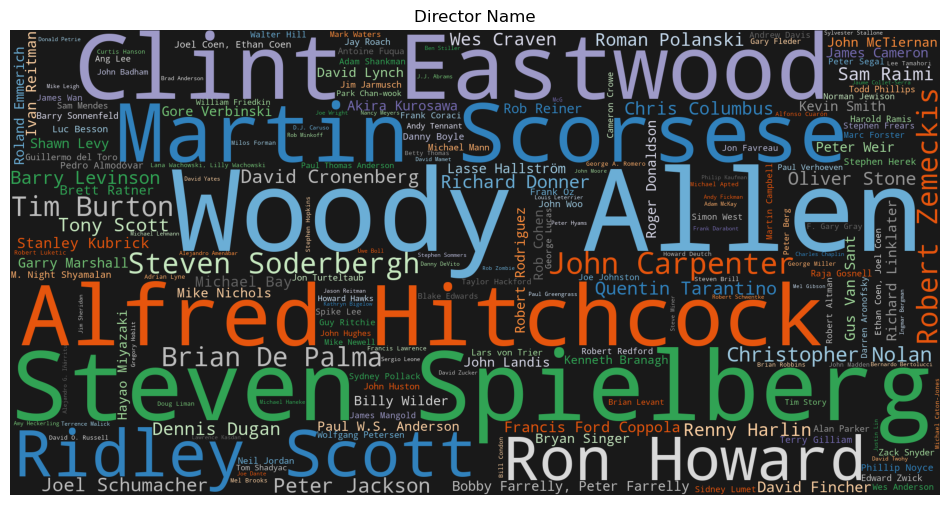

In [50]:
plt.figure(figsize=(12,8))
data = df['directors'].value_counts().to_dict()
wc = WordCloud(width= 2000, height = 1000, random_state=1,background_color='#191919', colormap='tab20c').generate_from_frequencies(data)
plt.imshow(wc)
plt.title('Director Name')
plt.axis('off')
plt.show()

In [51]:
!pip install plotly

# 📹 **Top 10 Directors with most high score movies**

In [52]:
topDirector = df['directors'].value_counts().head(10)
topDirector = pd.DataFrame(data=topDirector)
topDirector.head(10)

count
directors               
Woody Allen           37
Steven Spielberg      32
Clint Eastwood        28
Alfred Hitchcock      24
Martin Scorsese       23
Ridley Scott          23
Ron Howard            20
John Carpenter        18
Steven Soderbergh     17
Robert Zemeckis       17

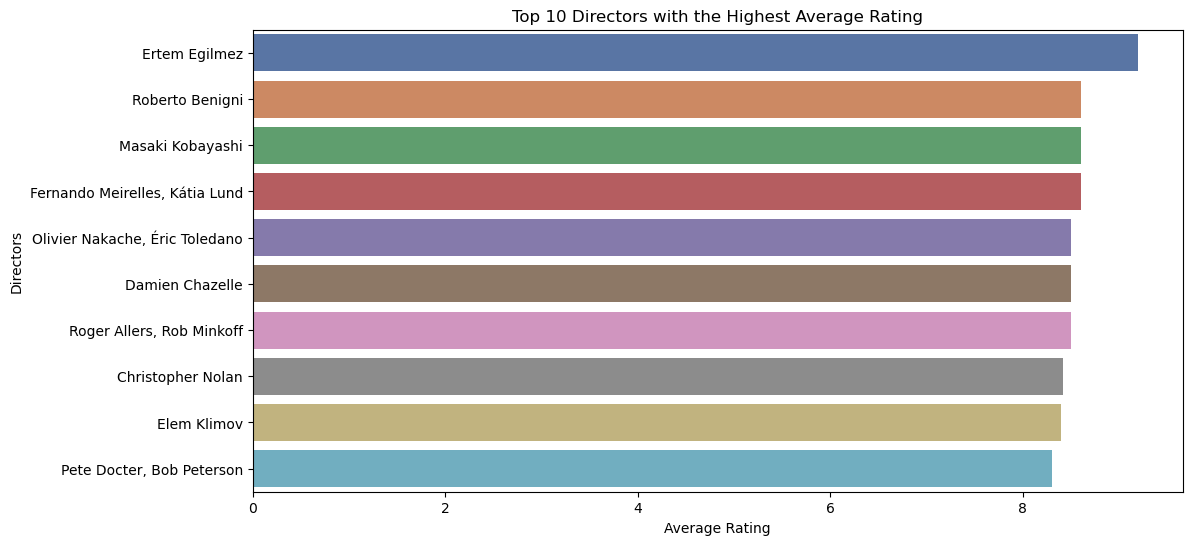

In [53]:
# Top 10 Directors with the Highest Average Rating
top_directors = new_data.groupby('directors')['rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='deep')
plt.title('Top 10 Directors with the Highest Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Directors')
plt.show()

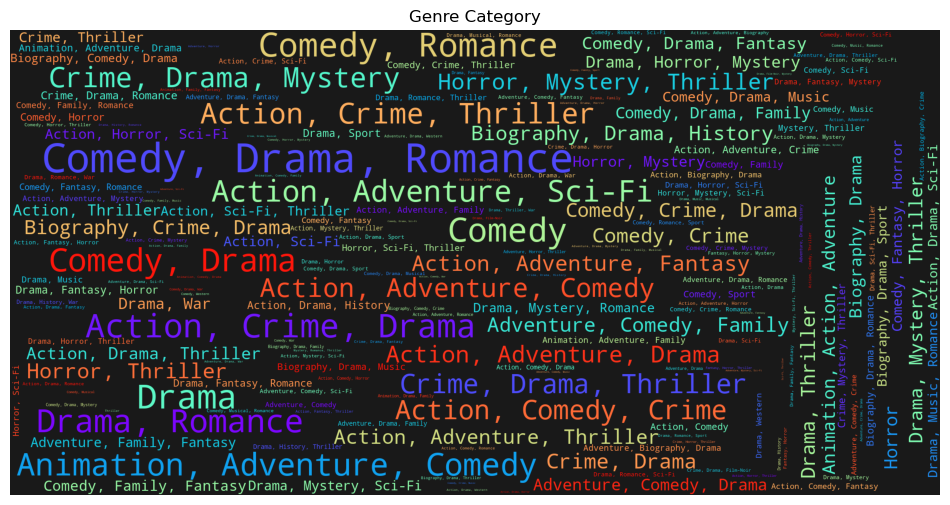

In [54]:
plt.figure(figsize=(12,8))
data = df['genre'].value_counts().to_dict()
wc = WordCloud(width= 2000, height = 1000, random_state=1,background_color='#191919', colormap='rainbow').generate_from_frequencies(data)
plt.imshow(wc)
plt.title('Genre Category')
plt.axis('off')
plt.show()

#Heatmap to compare variables across category

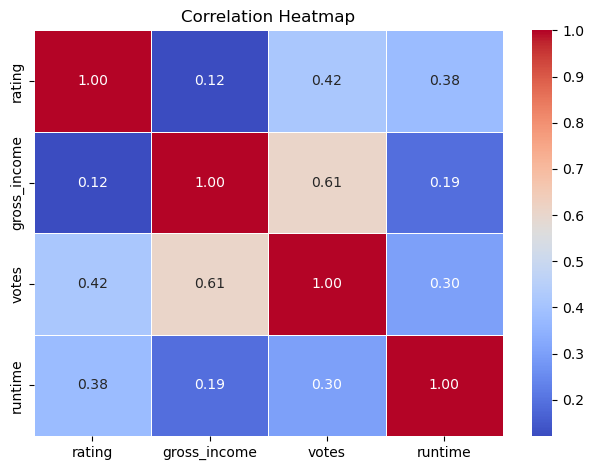

In [55]:
sns.heatmap(new_data.corr( numeric_only= True), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

# 📈Quick & comprehensive overview of the relationships between different features

C:\Users\HP\Documents\Python Scripts\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


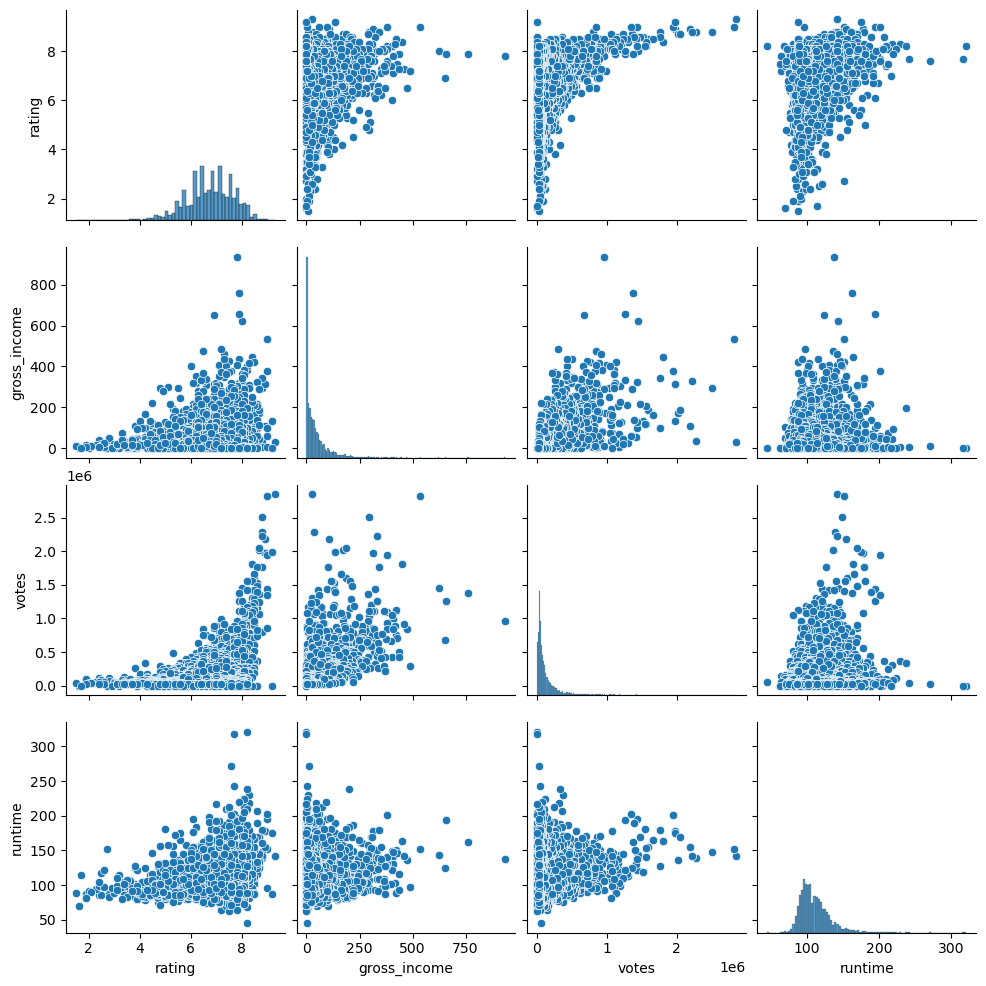

In [56]:
import seaborn as sns
sns.pairplot(df)
# Each subplot in the grid represents the relationship between two variables,
# and the diagonal subplots display a univariate distribution for each variable.

C:\Users\HP\AppData\Local\Temp\ipykernel_8172\2948346650.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['gross_income']) #Most of the movies earned a revenue between 0 to 200 ($ millions)


<Axes: xlabel='gross_income', ylabel='Density'>

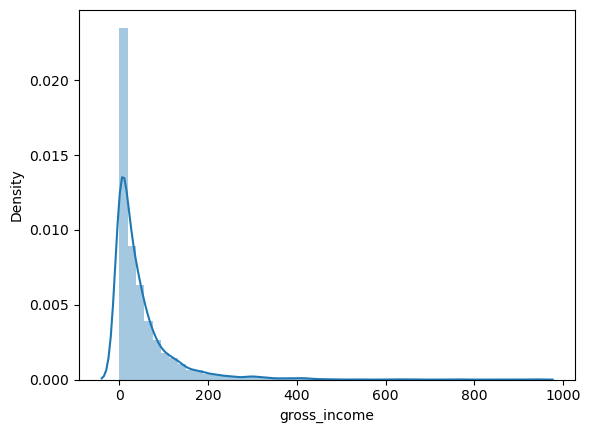

In [57]:
sns.distplot(df['gross_income']) #Most of the movies earned a revenue between 0 to 200 ($ millions)

C:\Users\HP\AppData\Local\Temp\ipykernel_8172\3667955085.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['rating']) #Most of the top movies are rated between 5 to 9 on IMDb website


<Axes: xlabel='rating', ylabel='Density'>

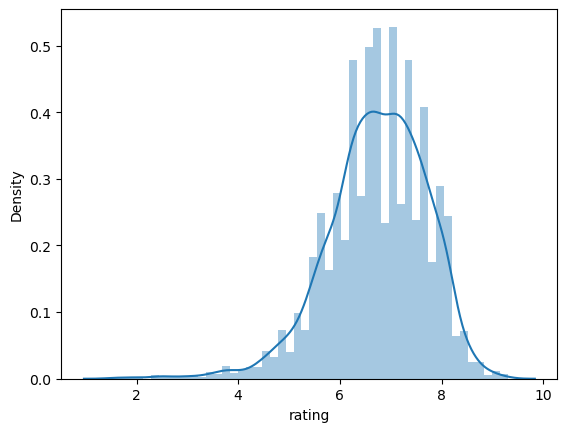

In [58]:
sns.distplot(df['rating']) #Most of the top movies are rated between 5 to 9 on IMDb website

C:\Users\HP\AppData\Local\Temp\ipykernel_8172\3733484274.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['runtime']) #Most of movies runtime is between 75 to 150 mins


<Axes: xlabel='runtime', ylabel='Density'>

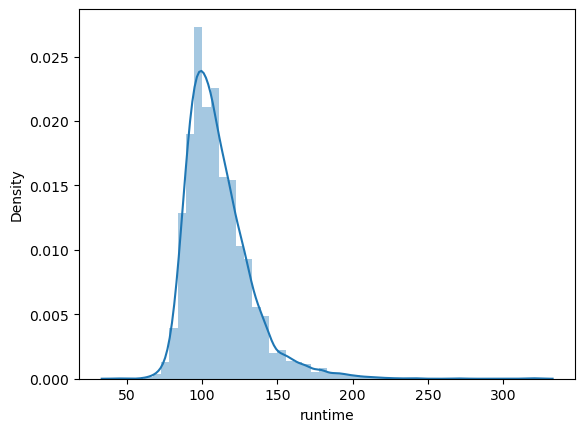

In [59]:
sns.distplot(df['runtime']) #Most of movies runtime is between 75 to 150 mins

# 🎞️Top 10 Movie Genre

In [60]:
genrecount = df.groupby('genre').count().sort_values(by = 'movie_name', ascending=False).head(10)
genrecount.rename(columns={'index':'Value'}, inplace=True)

In [61]:
!pip install squarify

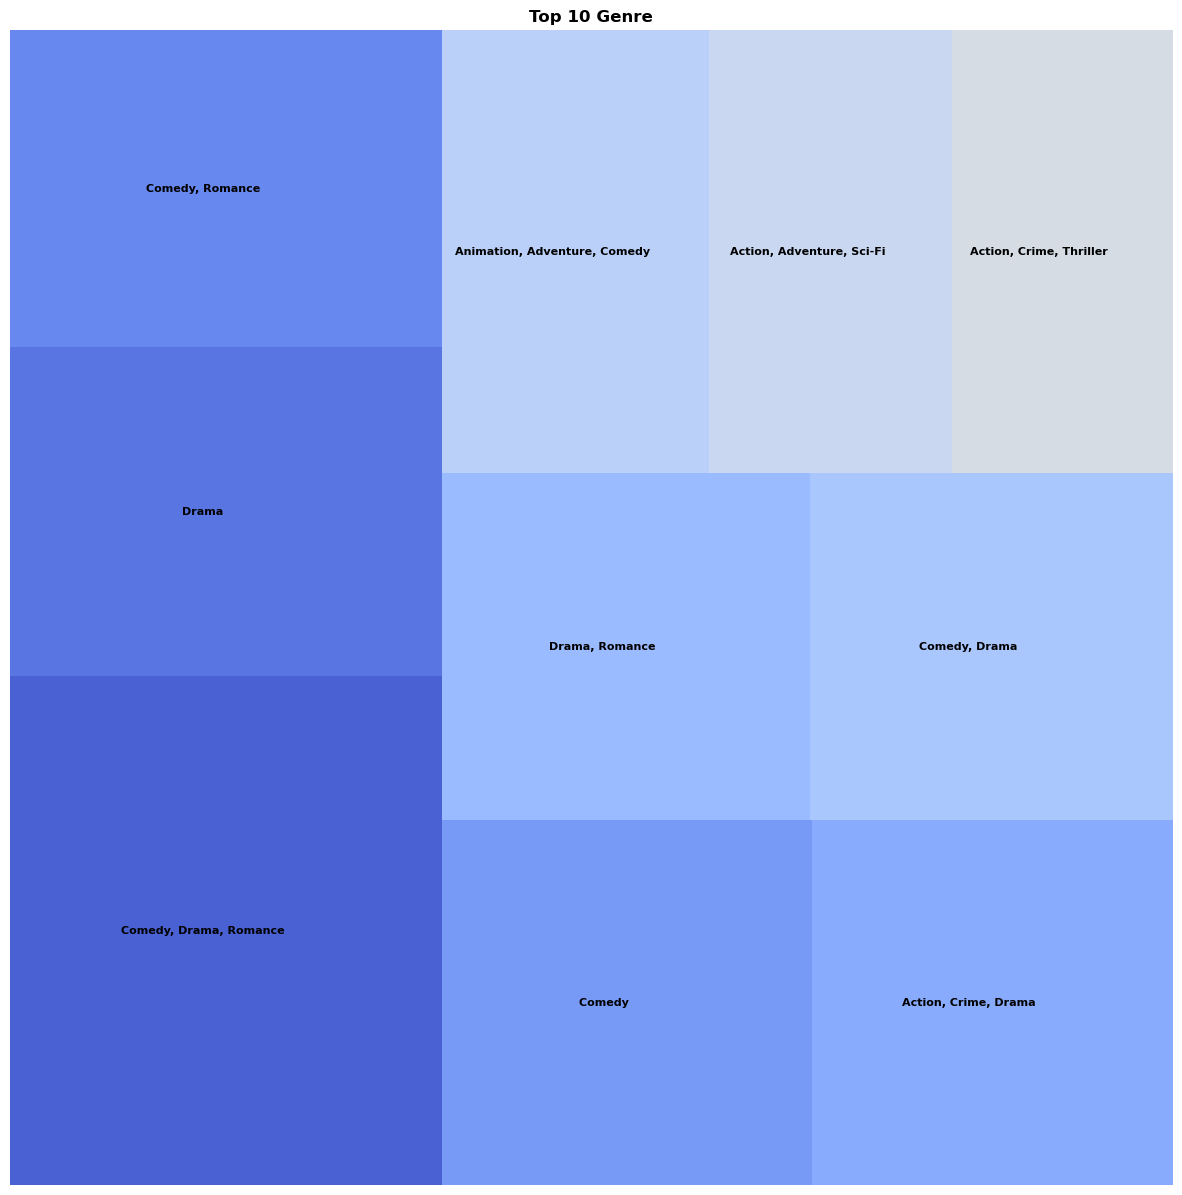

In [62]:
from matplotlib import gridspec

import squarify

y = genrecount
fig = plt.figure(figsize=(15, 15))
squarify.plot(sizes = y.movie_name, label = y.index, color=sns.color_palette("coolwarm", n_colors=20),
             linewidth=6, text_kwargs={'fontsize':8, 'fontweight' : 'bold'})
plt.title('Top 10 Genre', position=(0.5, 1.0+0.03), fontsize = 12, fontweight='bold')
plt.axis('off')
plt.show()

#Top trending movies based on ratings

In [63]:
sorted_movies = new_data.sort_values(by='rating', ascending=False)
top_movies = sorted_movies.head(10)

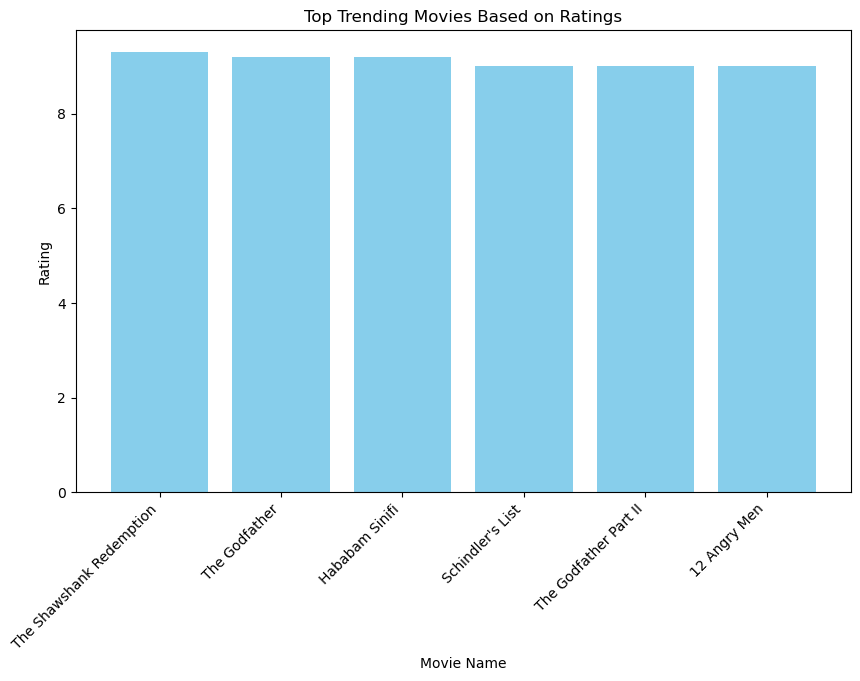

In [64]:
plt.figure(figsize=(10, 6))
plt.bar(top_movies['movie_name'], top_movies['rating'], color='skyblue')
plt.xlabel('Movie Name')
plt.ylabel('Rating')
plt.title('Top Trending Movies Based on Ratings')
plt.xticks(rotation=45, ha='right')
plt.show()

#Top trending movies based on gross_income

In [65]:
sorted_movies_by_income = new_data.sort_values(by='gross_income', ascending=False)
top_movies_by_income = sorted_movies_by_income.head(10)

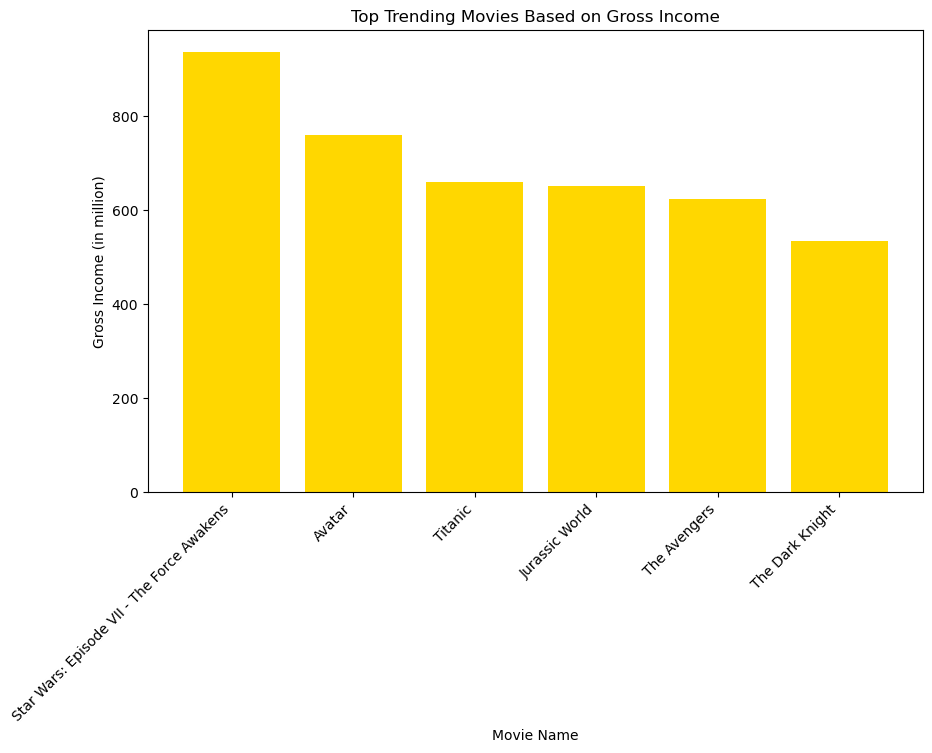

In [66]:
plt.figure(figsize=(10, 6))
plt.bar(top_movies_by_income['movie_name'], top_movies_by_income['gross_income'], color='gold')
plt.xlabel('Movie Name')
plt.ylabel('Gross Income (in million)')
plt.title('Top Trending Movies Based on Gross Income')
plt.xticks(rotation=45, ha='right')
plt.show()

#Impact of runtime on gross_income

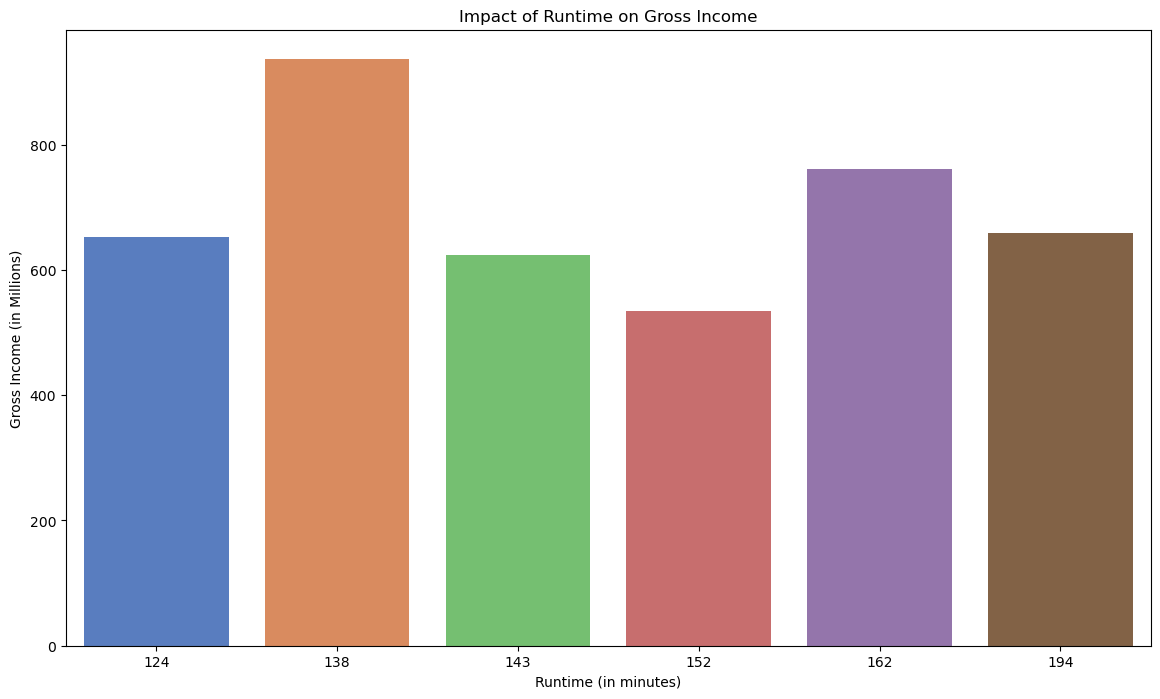

In [67]:
# Sort the DataFrame by Gross Income in descending order and select the top 10
top_10_runtime_vs_income = new_data.sort_values(by='gross_income', ascending=False).head(10)

# Bar Plot: Impact of Runtime on Gross Income for Top 10 Movies
plt.figure(figsize=(14, 8))
sns.barplot(x='runtime', y='gross_income', data=top_10_runtime_vs_income, palette='muted')
plt.title('Impact of Runtime on Gross Income')
plt.xlabel('Runtime (in minutes)')
plt.ylabel('Gross Income (in Millions)')
plt.show()


# 🔞 Certificate determine the frequency of censor board rating

Text(0.5, 1.0, 'Frequency of censor board rating')

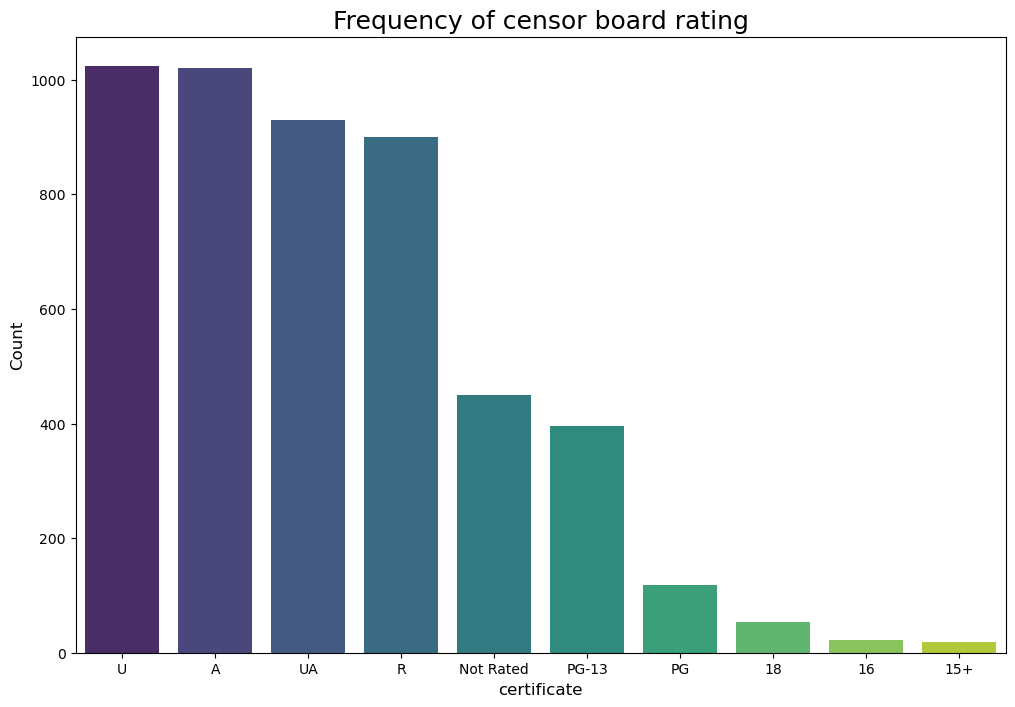

In [68]:
plt.figure(figsize=(12,8))
censor = sns.countplot(x='certificate',data=df, order=df['certificate'].value_counts().index[0:10],palette='viridis')
plt.ylabel('Count',fontsize=12)
plt.xlabel('certificate',fontsize=12)
plt.title('Frequency of censor board rating',fontsize=18)

## 📈 Frequency of High Score Movies in Each Year

Text(0.5, 58.7222222222222, 'Date')

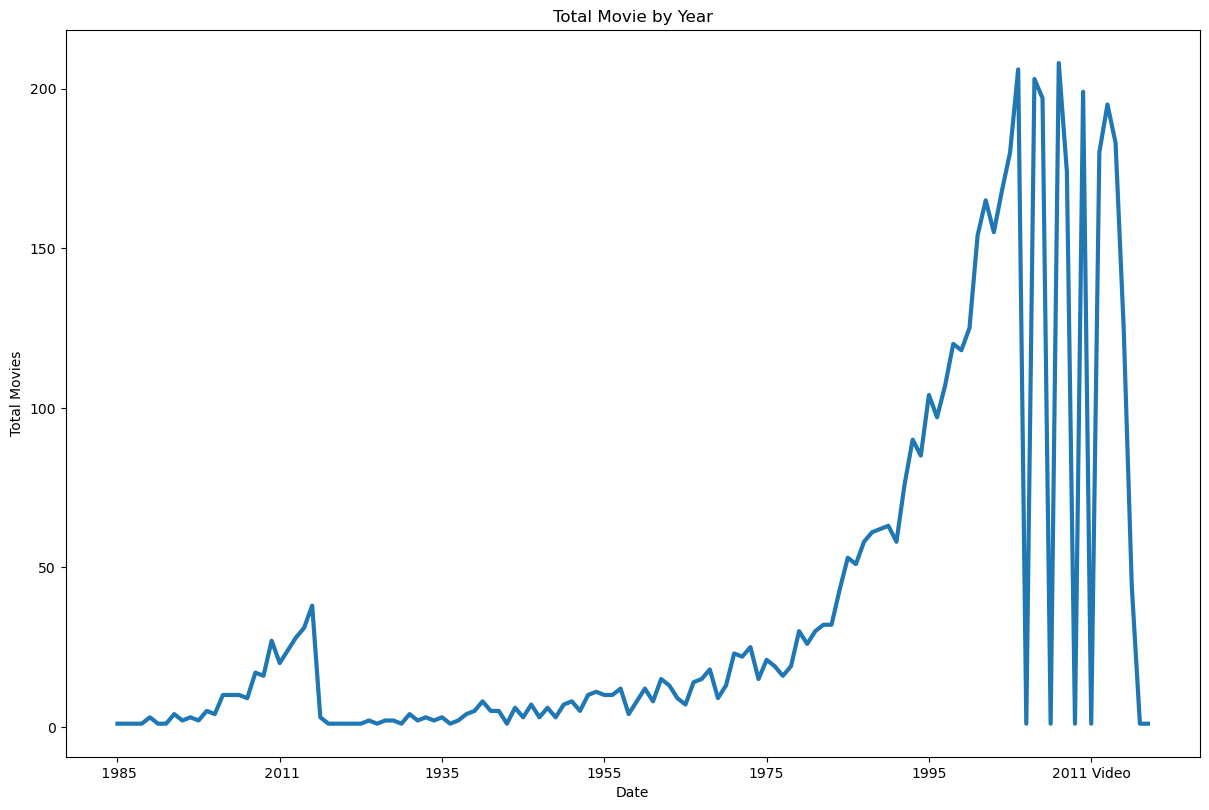

In [69]:
plt.figure(figsize=(12,8))
df.groupby('year').count()['movie_name'].plot(linewidth = 3)
plt.tight_layout()
plt.title('Total Movie by Year')
plt.ylabel("Total Movies")
plt.xlabel("Date")

In [72]:
topyear = pd.Series(collections.Counter(df['year']), name="year").to_frame(name = 'Count').sort_values(by = 'Count',ascending=False).head(10)

Text(0.5, 1.0, 'Frequency of Movies in each year')

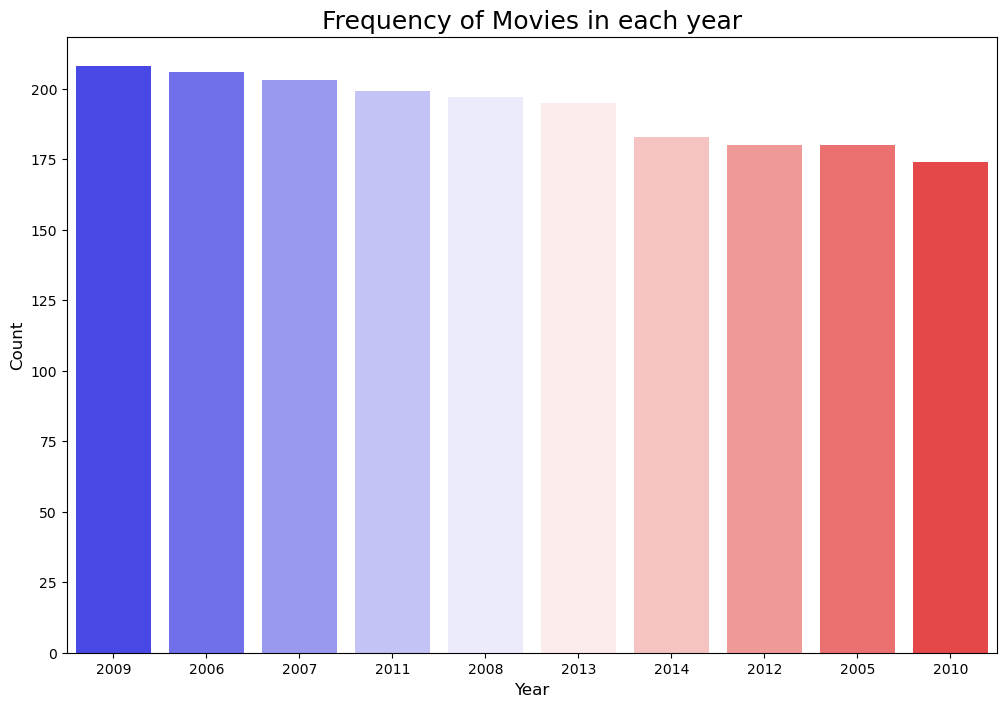

In [73]:
plt.figure(figsize=(12,8))
sns.barplot(x=topyear.index, y=topyear.Count, data=topyear,order = topyear['Count'].index[0:10],palette="bwr")
plt.ylabel('Count',fontsize=12)
plt.xlabel('Year',fontsize=12)
plt.title('Frequency of Movies in each year',fontsize=18)

# 🎬 Top 30 Movies on IMDb based on rating

In [74]:
top30movies = df.sort_values(by=['rating'], ascending=False).head(30)

Text(0.5, 0, 'Rating')

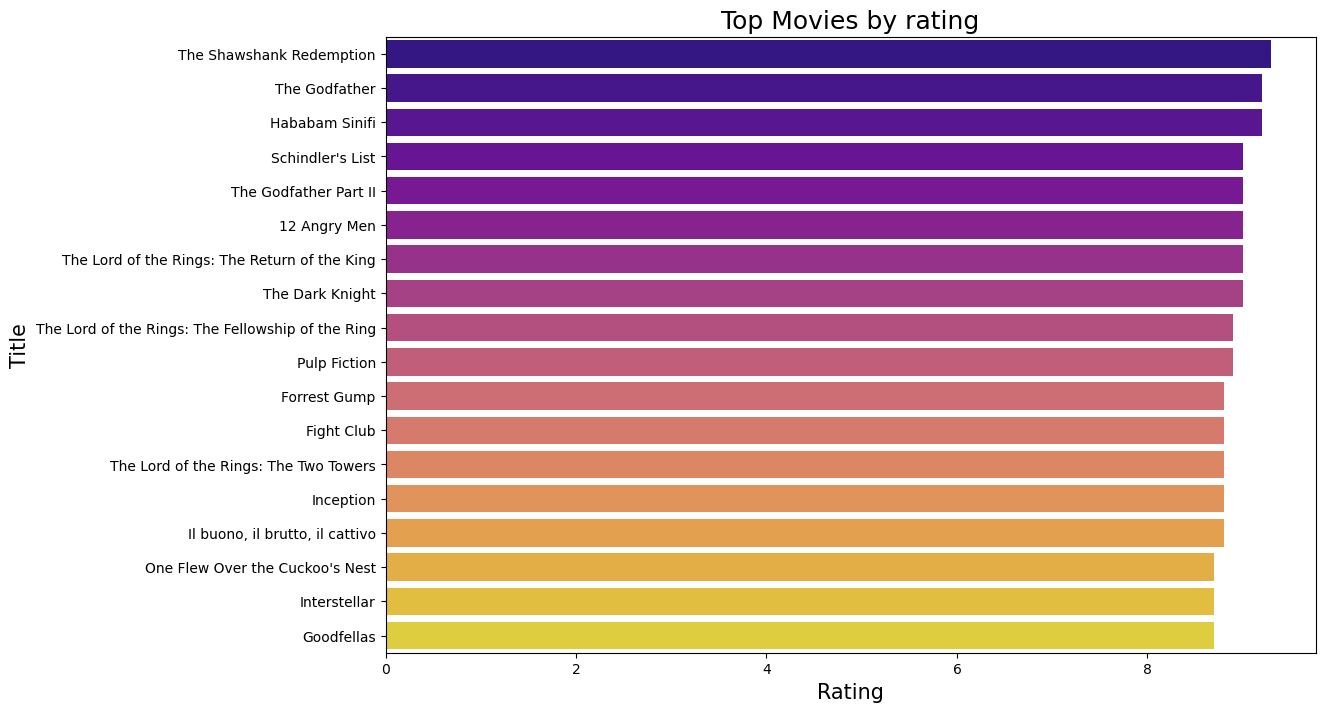

In [75]:
plt.figure(figsize=(12,8))
sns.barplot(x='rating',y=top30movies.movie_name[0:31],data=top30movies,palette='plasma')
plt.title('Top Movies by rating',fontsize=18, color = 'black')
plt.ylabel('Title',fontsize=15)
plt.xlabel('Rating',fontsize=15)

#Top movies based on gross_income

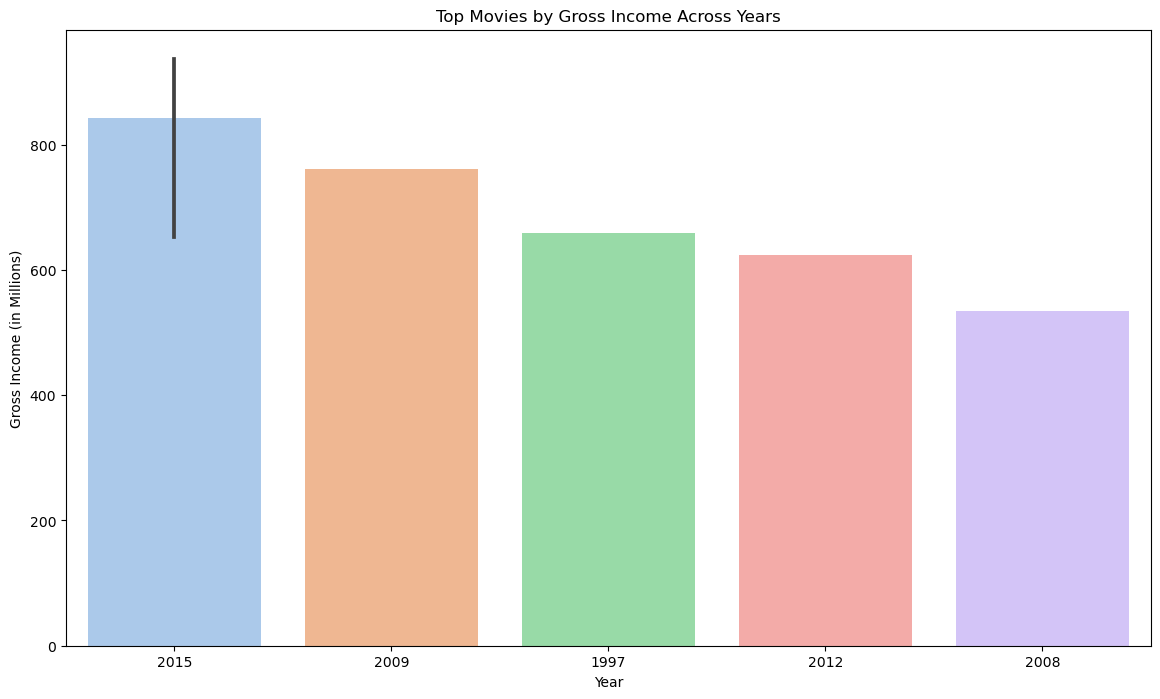

In [76]:
top_10_gross_income = new_data.sort_values(by='gross_income', ascending=False).head(10)
plt.figure(figsize=(14, 8))
sns.barplot(x='year', y='gross_income', data=top_10_gross_income, palette='pastel')
plt.title('Top Movies by Gross Income Across Years')
plt.xlabel('Year')
plt.ylabel('Gross Income (in Millions)')
plt.show()


# # Vectorization

In [78]:
df2=df.copy()
df2.head()

movie_name  year  rating certificate  gross_income    votes  \
0  The Shawshank Redemption  1994     9.3           A         28.34  2848305   
1           The Dark Knight  2008     9.0          UA        534.86  2829661   
2                 Inception  2010     8.8          UA        292.58  2512171   
3                Fight Club  1999     8.8           A         37.03  2283669   
4              Pulp Fiction  1994     8.9           A        107.93  2186292   

   runtime                                  genre  \
0      142                      Drama               
1      152       Action, Crime, Drama               
2      148  Action, Adventure, Sci-Fi               
3      139                      Drama               
4      154               Crime, Drama               

                                         description          directors  \
0  Over the course of several years, two convicts...     Frank Darabont   
1  When the menace known as the Joker wreaks havo...  Christopher Nolan   
2  A thief who steals corporate secrets through t...  Christopher Nolan   
3  An insomniac office worker and a devil-may-car...      David Fincher   
4  The lives of two mob hitmen, a boxer, a gangst...  Quentin Tarantino   

                                               stars  
0       Stars:Tim Robbins, Morgan Freeman, Bob Gu...  
1       Stars:Christian Bale, Heath Ledger, Aaron...  
2       Stars:Leonardo DiCaprio, Joseph Gordon-Le...  
3       Stars:Brad Pitt, Edward Norton, Meat Loaf...  
4       Stars:John Travolta, Uma Thurman, Samuel ...

In [79]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4999 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie_name    4999 non-null   object 
 1   year          4999 non-null   object 
 2   rating        4999 non-null   float64
 3   certificate   4999 non-null   object 
 4   gross_income  4999 non-null   float64
 5   votes         4999 non-null   int64  
 6   runtime       4999 non-null   int64  
 7   genre         4999 non-null   object 
 8   description   4999 non-null   object 
 9   directors     4999 non-null   object 
 10  stars         4999 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 468.7+ KB


In [80]:
df2=df2.drop(['year','rating','gross_income','votes','runtime'],axis=1)

In [81]:
df2.head()

movie_name certificate  \
0  The Shawshank Redemption           A   
1           The Dark Knight          UA   
2                 Inception          UA   
3                Fight Club           A   
4              Pulp Fiction           A   

                                   genre  \
0                      Drama               
1       Action, Crime, Drama               
2  Action, Adventure, Sci-Fi               
3                      Drama               
4               Crime, Drama               

                                         description          directors  \
0  Over the course of several years, two convicts...     Frank Darabont   
1  When the menace known as the Joker wreaks havo...  Christopher Nolan   
2  A thief who steals corporate secrets through t...  Christopher Nolan   
3  An insomniac office worker and a devil-may-car...      David Fincher   
4  The lives of two mob hitmen, a boxer, a gangst...  Quentin Tarantino   

                                               stars  
0       Stars:Tim Robbins, Morgan Freeman, Bob Gu...  
1       Stars:Christian Bale, Heath Ledger, Aaron...  
2       Stars:Leonardo DiCaprio, Joseph Gordon-Le...  
3       Stars:Brad Pitt, Edward Norton, Meat Loaf...  
4       Stars:John Travolta, Uma Thurman, Samuel ...

In [82]:
#Converting all column into list
df2['directors'] = df2['directors'].apply(lambda x: x.replace(" ", "").split(','))
df2['stars'] = df2['stars'].apply(lambda x: x.replace(" ", "").split(','))
df2['genre'] = df2['genre'].apply(lambda x: x.replace(" ", "").split(','))
df2['certificate'] = df2['certificate'].apply(lambda x: x.replace(" ", "").split(','))
df2.head()

movie_name certificate                        genre  \
0  The Shawshank Redemption         [A]                      [Drama]   
1           The Dark Knight        [UA]       [Action, Crime, Drama]   
2                 Inception        [UA]  [Action, Adventure, Sci-Fi]   
3                Fight Club         [A]                      [Drama]   
4              Pulp Fiction         [A]               [Crime, Drama]   

                                         description           directors  \
0  Over the course of several years, two convicts...     [FrankDarabont]   
1  When the menace known as the Joker wreaks havo...  [ChristopherNolan]   
2  A thief who steals corporate secrets through t...  [ChristopherNolan]   
3  An insomniac office worker and a devil-may-car...      [DavidFincher]   
4  The lives of two mob hitmen, a boxer, a gangst...  [QuentinTarantino]   

                                               stars  
0  [Stars:TimRobbins, MorganFreeman, BobGunton, W...  
1  [Stars:ChristianBale, HeathLedger, AaronEckhar...  
2  [Stars:LeonardoDiCaprio, JosephGordon-Levitt, ...  
3  [Stars:BradPitt, EdwardNorton, MeatLoaf, ZachG...  
4  [Stars:JohnTravolta, UmaThurman, SamuelL.Jacks...

# combines the columns

In [84]:
df2['overall'] = (
    df2['description'].astype(str) +
    df2['genre'].astype(str) +
    df2['certificate'].astype(str) +
    df2['stars'].astype(str) +
    df2['directors'].astype(str)
)

In [85]:
df2.head()

movie_name certificate                        genre  \
0  The Shawshank Redemption         [A]                      [Drama]   
1           The Dark Knight        [UA]       [Action, Crime, Drama]   
2                 Inception        [UA]  [Action, Adventure, Sci-Fi]   
3                Fight Club         [A]                      [Drama]   
4              Pulp Fiction         [A]               [Crime, Drama]   

                                         description           directors  \
0  Over the course of several years, two convicts...     [FrankDarabont]   
1  When the menace known as the Joker wreaks havo...  [ChristopherNolan]   
2  A thief who steals corporate secrets through t...  [ChristopherNolan]   
3  An insomniac office worker and a devil-may-car...      [DavidFincher]   
4  The lives of two mob hitmen, a boxer, a gangst...  [QuentinTarantino]   

                                               stars  \
0  [Stars:TimRobbins, MorganFreeman, BobGunton, W...   
1  [Stars:ChristianBale, HeathLedger, AaronEckhar...   
2  [Stars:LeonardoDiCaprio, JosephGordon-Levitt, ...   
3  [Stars:BradPitt, EdwardNorton, MeatLoaf, ZachG...   
4  [Stars:JohnTravolta, UmaThurman, SamuelL.Jacks...   

                                             overall  
0  Over the course of several years, two convicts...  
1  When the menace known as the Joker wreaks havo...  
2  A thief who steals corporate secrets through t...  
3  An insomniac office worker and a devil-may-car...  
4  The lives of two mob hitmen, a boxer, a gangst...

In [86]:
df3=df2[['movie_name','overall']]
df3

movie_name  \
0     The Shawshank Redemption   
1              The Dark Knight   
2                    Inception   
3                   Fight Club   
4                 Pulp Fiction   
...                        ...   
4995            House of Games   
4996                Umberto D.   
4997                 The Women   
4998       Aliens in the Attic   
4999             The Promotion   

                                                overall  
0     Over the course of several years, two convicts...  
1     When the menace known as the Joker wreaks havo...  
2     A thief who steals corporate secrets through t...  
3     An insomniac office worker and a devil-may-car...  
4     The lives of two mob hitmen, a boxer, a gangst...  
...                                                 ...  
4995  A psychiatrist comes to the aid of a compulsiv...  
4996  An elderly man and his dog struggle to survive...  
4997  A wealthy New Yorker wrestles with the decisio...  
4998  A group of kids must protect their vacation ho...  
4999  Two assistant managers of a corporate grocery ...  

[4999 rows x 2 columns]

In [87]:
#convert 'overall' into lower case
df3["overalls"] = df3["overall"].apply(lambda x: x.lower())

C:\Users\HP\AppData\Local\Temp\ipykernel_8172\1262372860.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["overalls"] = df3["overall"].apply(lambda x: x.lower())


In [88]:
df3.head()

movie_name  \
0  The Shawshank Redemption   
1           The Dark Knight   
2                 Inception   
3                Fight Club   
4              Pulp Fiction   

                                             overall  \
0  Over the course of several years, two convicts...   
1  When the menace known as the Joker wreaks havo...   
2  A thief who steals corporate secrets through t...   
3  An insomniac office worker and a devil-may-car...   
4  The lives of two mob hitmen, a boxer, a gangst...   

                                            overalls  
0  over the course of several years, two convicts...  
1  when the menace known as the joker wreaks havo...  
2  a thief who steals corporate secrets through t...  
3  an insomniac office worker and a devil-may-car...  
4  the lives of two mob hitmen, a boxer, a gangst...

In [89]:
df3 = df3.drop('overall', axis=1)

In [90]:
df3.head()

movie_name                                           overalls
0  The Shawshank Redemption  over the course of several years, two convicts...
1           The Dark Knight  when the menace known as the joker wreaks havo...
2                 Inception  a thief who steals corporate secrets through t...
3                Fight Club  an insomniac office worker and a devil-may-car...
4              Pulp Fiction  the lives of two mob hitmen, a boxer, a gangst...

In [91]:
import nltk
from nltk.stem import PorterStemmer
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [92]:
ps = PorterStemmer()

In [93]:
df3["overalls"] = df3["overalls"].apply(lambda text: " ".join([ps.stem(word) for word in nltk.word_tokenize(text)]))

In [94]:
df3['overalls'][0]

"over the cours of sever year , two convict form a friendship , seek consol and , eventu , redempt through basic compass . [ 'drama ' ] [ ' a ' ] [ 'star : timrobbin ' , 'morganfreeman ' , 'bobgunton ' , 'williamsadl ' ] [ 'frankdarabont ' ]"

In [95]:
from sklearn.feature_extraction.text import CountVectorizer

In [96]:
cv= CountVectorizer(stop_words='english', max_features=7000)

In [97]:
cv.fit_transform(df3["overalls"]).toarray().shape

(4999, 7000)

In [98]:
vectors=cv.fit_transform(df3['overalls']).toarray()
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [99]:
vectors[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [100]:
#cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

In [101]:
cosine_similarity(vectors)

array([[1.        , 0.08908708, 0.03984095, ..., 0.10540926, 0.06804138,
        0.06537205],
       [0.08908708, 1.        , 0.19166297, ..., 0.12677314, 0.05455447,
        0.05241424],
       [0.03984095, 0.19166297, 1.        , ..., 0.07559289, 0.09759001,
        0.09376145],
       ...,
       [0.10540926, 0.12677314, 0.07559289, ..., 1.        , 0.12909944,
        0.12403473],
       [0.06804138, 0.05455447, 0.09759001, ..., 0.12909944, 1.        ,
        0.16012815],
       [0.06537205, 0.05241424, 0.09376145, ..., 0.12403473, 0.16012815,
        1.        ]])

In [102]:
similarity = cosine_similarity(vectors)

In [103]:
sorted(list (enumerate(similarity[0])), reverse=True ,key=lambda x: x[1])[1:6]

[(100, 1.0000000000000002),
 (1203, 0.24253562503633297),
 (2114, 0.23570226039551587),
 (707, 0.2311250817605122),
 (3216, 0.22222222222222227)]

In [104]:
def recommend(movie):

  movie_index= df3[df3["movie_name"]== movie].index[0]
  distances= similarity[movie_index]
  movies_list = sorted(list (enumerate(distances)), reverse=True ,key=lambda x: x[1])[1:11]

  for i in movies_list:
    print(df3.iloc[i[0]].movie_name)


In [111]:
#Checking Recommendation
recommend('The Shawshank Redemption')

The Shawshank Redemption
Mary and Max.
Stuck in Love
Atonement
Short Cuts
Nuovo Cinema Paradiso
Joe
Life
A Long Way Down
2046


In [112]:
data = df3.copy()

In [113]:
#TF-IDF means term frequency -Inverse Document Frequency

In [114]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [115]:
tfv = TfidfVectorizer(min_df=3,max_features=None,
                     strip_accents='unicode',analyzer= 'word',token_pattern=r'\w{1,}',
                     ngram_range=(1,3),
                     stop_words='english')

In [116]:
tfv_matrix = tfv.fit_transform(data['overalls'])

In [117]:
tfv_matrix

<4999x11248 sparse matrix of type '<class 'numpy.float64'>'
	with 160373 stored elements in Compressed Sparse Row format>

In [118]:
from sklearn.metrics.pairwise import sigmoid_kernel
sig = sigmoid_kernel(tfv_matrix,tfv_matrix)  # it computes text document similarity

In [119]:
sig[0] 

array([0.76163149, 0.76159427, 0.76159419, ..., 0.7615943 , 0.76159421,
       0.7615942 ])

In [120]:
# this creates mapping between movie name with there corrresponding index
indices = pd.Series(data.index,index = data['movie_name']).drop_duplicates()

In [121]:
def Giv_rec(title,sig = sig):
    idx = indices[title]  #gets index of movie name
    
    sig_scores = list(enumerate(sig[idx]))  #it will enumerate sigmoid kernel score for movie 
    
    sig_scores = sorted(sig_scores,key = lambda x:x[1],reverse = True)
    
    sig_scores = sig_scores[1:6]
    
    movie_indices = [i[0] for i in sig_scores]
    
    return data['movie_name'].iloc[movie_indices]
    

In [123]:
import pickle

In [124]:
pickle.dump(df3.to_dict(),open('movie_dict.pkl','wb'))

In [125]:
pickle.dump(similarity,open('similarity.pkl','wb'))